In [15]:
# reload for pip install -e .

%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from fiber_predictor.svr_hog.data_processing import HogDataset

FILE_DIR = "../images/diffusion/diffusion_voxels"  # Directory containing image files
LABELS_PATH = "../images/diffusion/diffusion_voxels/labels.csv"  # CSV file containing filenames and angles


In [75]:
# HOG parameters
GRID_QUOTIENT = np.arange(1, 6)  # Grid Quotient for HOG extraction
ORIENTATIONS = 8  # Number of orientations for HOG extraction

# DataLoader parameters
BATCH_SIZE = 4  # Small batch size for demonstration


In [78]:
# Create the dataset instance with augmentation enabled for entire dataset
hog_dataset = HogDataset(
    labels_path=LABELS_PATH,
    file_dir=FILE_DIR,
    grid_quotient=GRID_QUOTIENT,
    orientations=ORIENTATIONS,
    augment_whole_dataset=True  # Set to True to include augmentation in dataset creation
)

# Create a DataLoader to load the data in batches
hog_dataloader = DataLoader(hog_dataset, batch_size=BATCH_SIZE, shuffle=True)


In [79]:
# Iterate over DataLoader to visualize batches
for batch_idx, (img_tensors, features, angles) in enumerate(hog_dataloader):
    print(f"Batch {batch_idx + 1}")
    print("Image Tensor shape:", img_tensors.shape)  # Tensor shape of images
    print("Features shape:", features.shape)
    print("Angles shape:", angles.shape)
    
    # Only display the first 2 batches
    if batch_idx == 1:
        break

Batch 1
Image Tensor shape: torch.Size([4, 1, 50, 50])
Features shape: torch.Size([4, 440])
Angles shape: torch.Size([4])
Batch 2
Image Tensor shape: torch.Size([4, 1, 50, 50])
Features shape: torch.Size([4, 440])
Angles shape: torch.Size([4])


In [93]:
import math
import PIL.Image as Image

def visualize_augmented_images(dataset, index):
    """
    Visualize the original image and its augmented versions.
    Parameters:
    - dataset: Instance of the HogDataset.
    - index: Index of the original image to visualize.
    """
    # Load the original image from dataset using the filename and labels
    img_filename = dataset.filenames[index]
    angle = dataset.labels[index]
    img_path = os.path.join(dataset.file_dir, img_filename)
    img = Image.open(img_path).convert('L')

    # Get augmented images and labels from the dataset
    # The augmented images are added in sequence after the original images
    num_augmentations_per_image = 7  # For each image, we have 7 augmentations
    aug_start_idx = index + len(dataset) // 7  # Start index of augmented images for the current image

    # Collect original and augmented images and angles
    all_images = [img]  # Start with the original image
    all_labels = [angle]

    for i in range(aug_start_idx, aug_start_idx + num_augmentations_per_image):
        aug_img_filename = dataset.filenames[i]
        aug_angle = dataset.labels[i]
        aug_img_path = os.path.join(dataset.file_dir, aug_img_filename)
        aug_img = Image.open(aug_img_path).convert('L')

        all_images.append(aug_img)
        all_labels.append(aug_angle)

    # Calculate the number of rows and columns needed for the grid
    total_images = len(all_images)
    num_cols = 3  # Set number of columns to 3
    num_rows = math.ceil(total_images / num_cols)  # Calculate required number of rows

    # Plot the original image and augmented images
    plt.figure(figsize=(15, 5 * num_rows))

    for i, (current_img, current_label) in enumerate(zip(all_images, all_labels)):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(current_img, cmap='gray')
        plt.title(f"Image {i + 1}\nAngle: {current_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


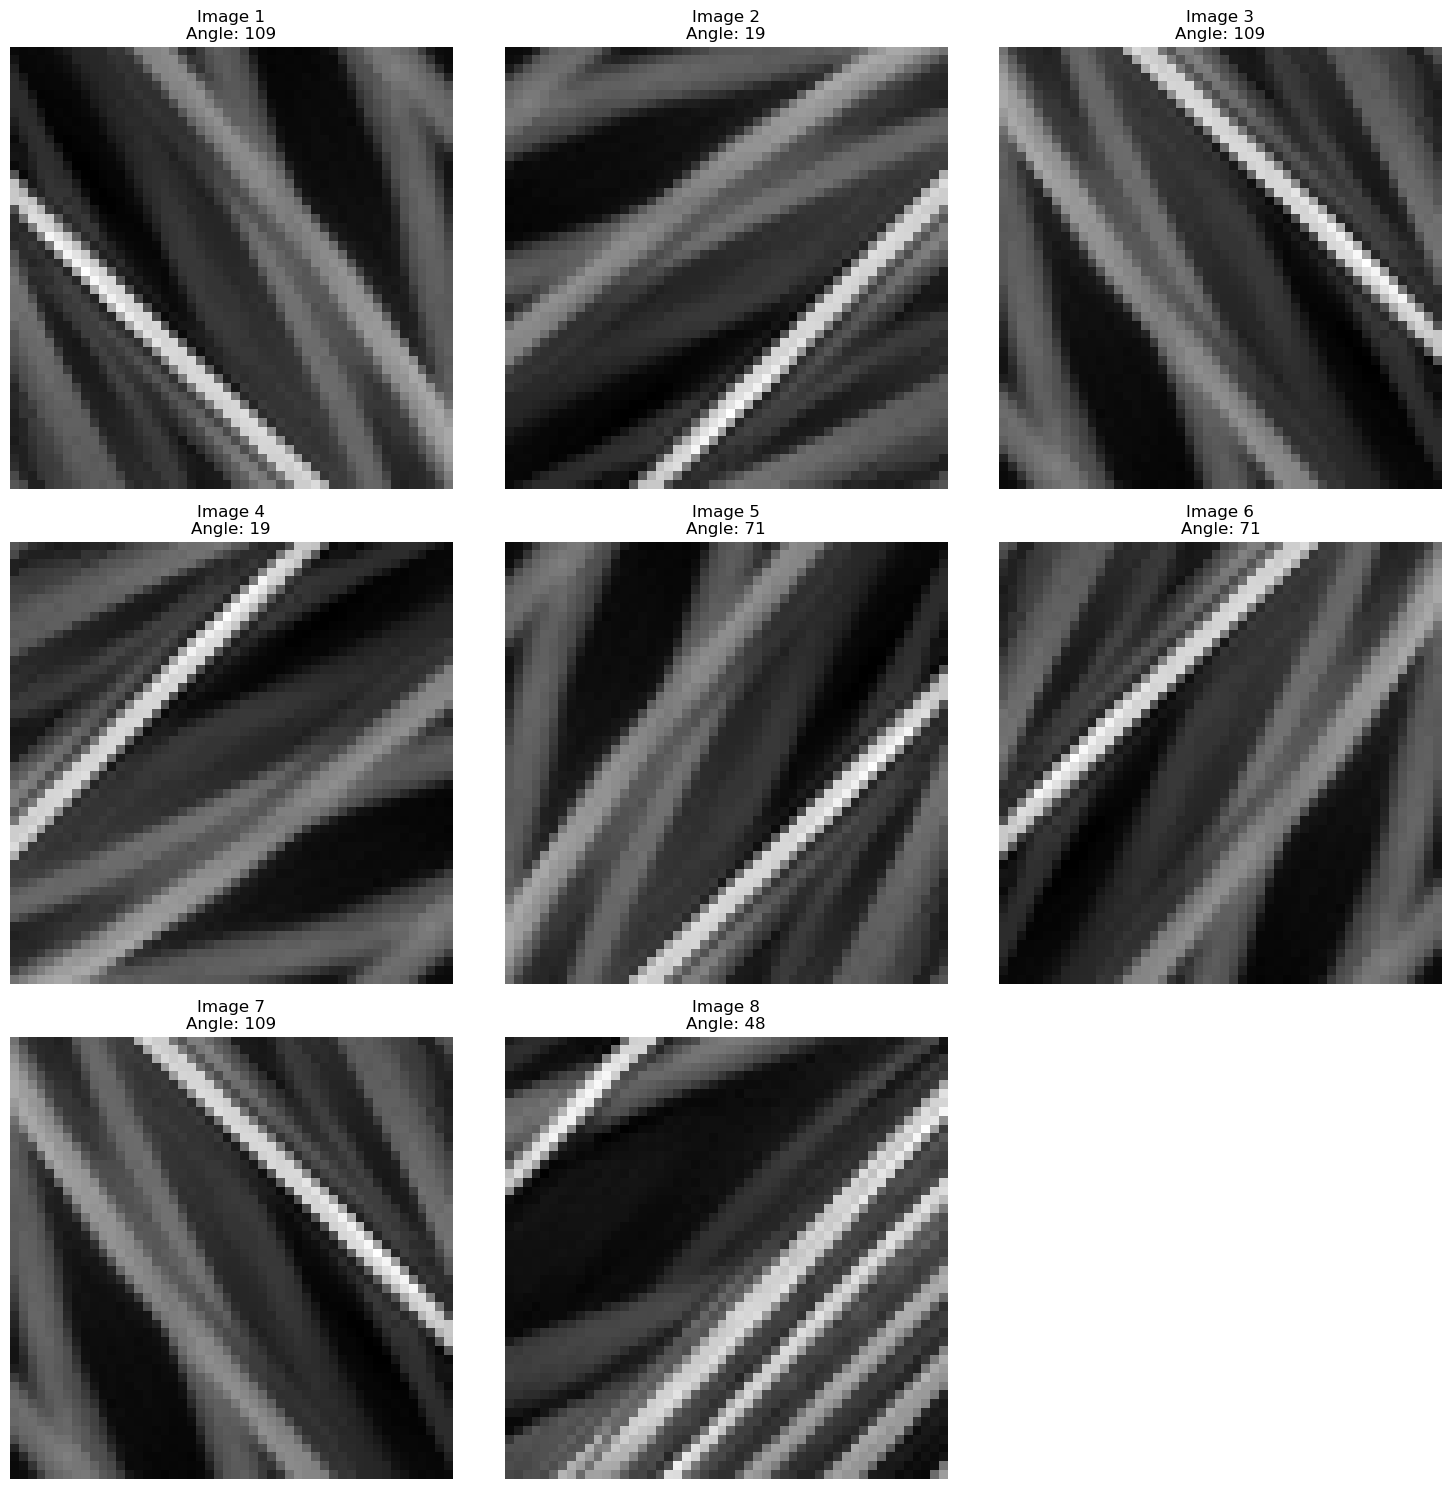

In [94]:
# Visualize augmented images and labels for the given index (e.g., index 0)
visualize_augmented_images(hog_dataset, index=0)


609.0